In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
sample_rate, data = wavfile.read("test1.wav")

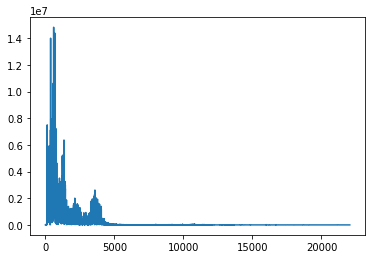

In [3]:
def dft(data, sample_rate):
    fourier = abs(fft(data))
    timestep = 1/float(sample_rate)
    freq = fftfreq(len(fourier), timestep)
    plt.plot(freq[range(len(fourier)//2)], fourier[range(len(fourier)//2)])

# fourier = abs(fft(data))
# timestep = 1/float(sample_rate)
# freq = fftfreq(len(fourier), timestep)
# plt.plot(freq[range(len(fourier)//2)], fourier[range(len(fourier)//2)])
# plt.show()

dft(data, sample_rate)

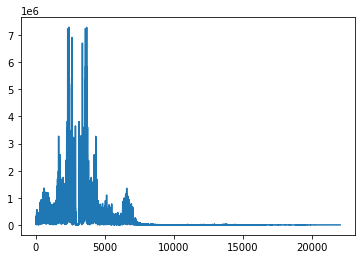

In [4]:
carrier_hz = 3000.0
signal_amsc = np.zeros_like(data, dtype=float)
signal_am = np.zeros_like(data, dtype=float)
carrier_signal = np.zeros_like(data, dtype=float)
time = np.zeros_like(data, dtype=float)
for i in range(len(data)):
    base = data[i]/32768.0
    carrier_sample = np.cos(carrier_hz * (i/sample_rate) * 2 * np.pi)
    signal_am[i] = signal_amsc[i] = base * carrier_sample
    signal_am[i] += carrier_sample
    signal_am[i] /= 2
    signal_amsc[i] *= 32768.0
    signal_am[i] *= 32768.0
    carrier_signal[i] = carrier_sample * 32768.0
    time[i] = i/sample_rate
wavfile.write("amsc_test.wav", sample_rate, signal_amsc.astype(np.int16))
wavfile.write("carrier_test.wav", sample_rate, carrier_signal.astype(np.int16))
wavfile.write("am_test.wav", sample_rate, signal_am.astype(np.int16))

dft(signal_amsc, sample_rate)

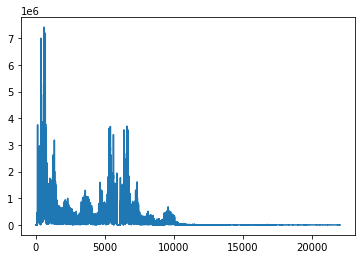

In [5]:
# amsc demodulation

signal_amsc_demod = np.zeros_like(signal_amsc, dtype=float)
for i in range(len(signal_amsc)):
    signal_amsc_demod[i] = signal_amsc[i]
    carrier_sample = np.cos(carrier_hz * (i/44100) * 2 * np.pi)
    signal_amsc_demod[i] *= carrier_sample
wavfile.write("amsc_demod_test.wav", sample_rate, signal_amsc_demod.astype(np.int16))
dft(signal_amsc_demod, sample_rate)

In [6]:
# am demodulation
signal_am_demod = np.zeros_like(signal_am, dtype=float)
for i in range(len(signal_am)):
    signal_am_demod[i] = abs(signal_am[i])
wavfile.write("am_test_demod.wav", sample_rate, signal_am_demod.astype(np.int16))

In [12]:
# fm modulation
fm_carrier_hz = 10000
max_deviation_hz = 1000
phase = 0
signal_fm = np.zeros_like(data, dtype=float)
for n in range(len(data)):
    phase += (data[n]/32768.0) * np.pi * max_deviation_hz / sample_rate
    phase %= 2 * np.pi
    # quadrature i, q
    i = np.cos(phase)
    q = np.sin(phase)
    
    carrier = 2 * np.pi * fm_carrier_hz * (n/sample_rate)
    output = i * np.cos(carrier) - q * np.sin(carrier)
    signal_fm[n] = output * 32768.0
wavfile.write("fm_test.wav", sample_rate, signal_fm.astype(np.int16))

In [ ]:
# fm demodulation
import random
signal_fm_demod = np.zeros_like(data, dtype=float)
initial_carrier_phase = random.randon * 2 * np.pi
prev_angle = 0.0
